# 이미지 인식의 꽃, CNN

# mnist 숫자 분류, 기본 ANN 구현

## mnist 데이터 분석

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import sys

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

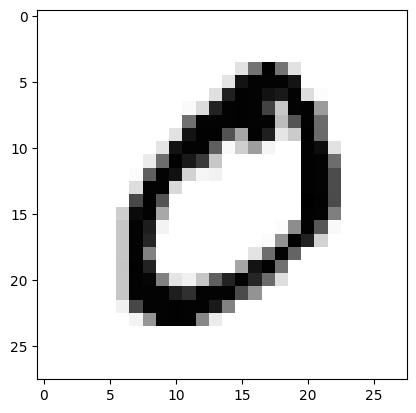

In [6]:
plt.imshow(X_train[1], cmap='Greys')
plt.show()

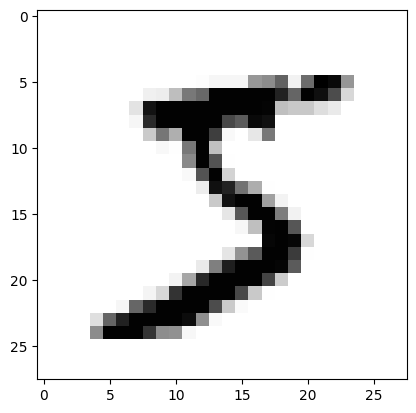

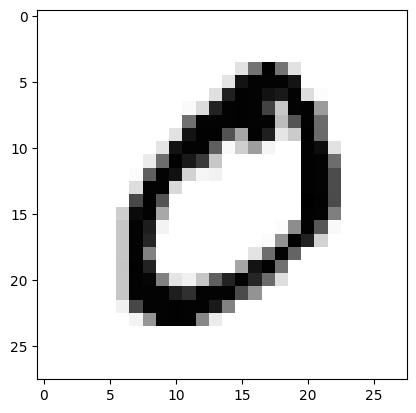

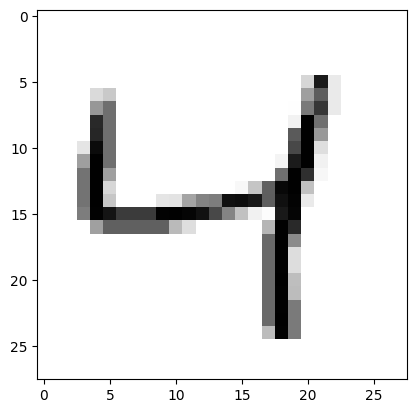

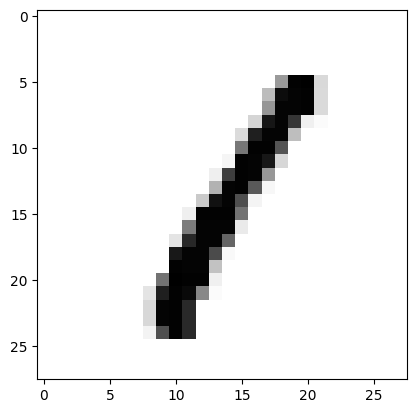

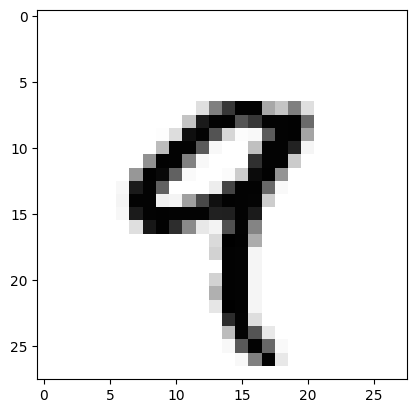

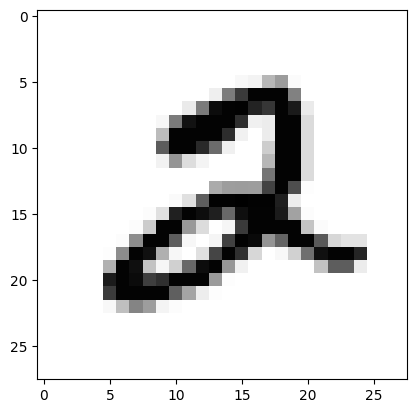

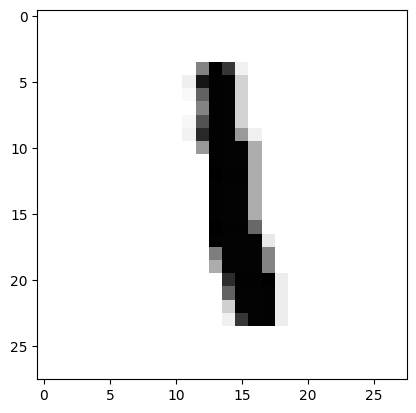

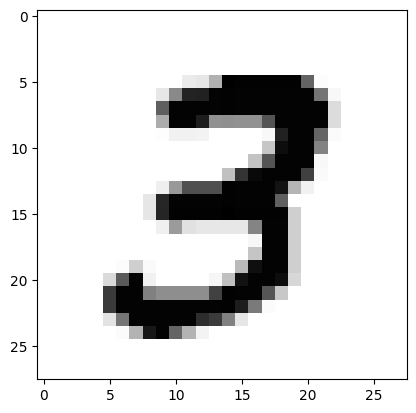

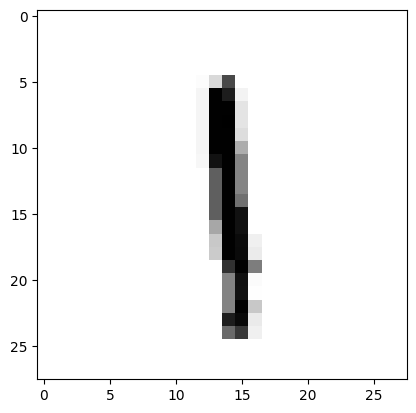

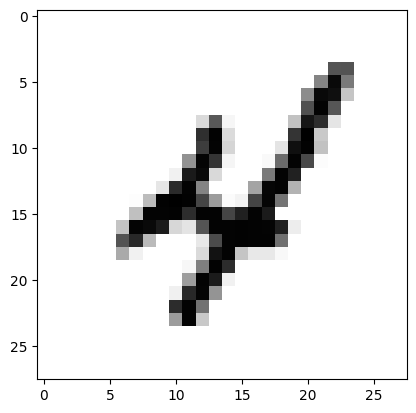

In [7]:
# 이미지로 데이터 확인
for i in np.arange(0,10):
 plt.imshow(X_train[i], cmap='Greys')
 plt.show()  


### 멀티라인으로 숫자이미지 표시하기
- 방법1

In [8]:
def display_mult_images(images, titles, rows, cols):
  figure, ax = plt.subplots(rows,cols)  # array of axes

  for idx, img in enumerate(images):  # images is a list
    ax.ravel()[idx].imshow(img,
      cmap=plt.get_cmap('gray_r'))
    ax.ravel()[idx].set_title(titles[idx])
    # ax.ravel90[idx].set_axis_off()
  plt.tight_layout()
  plt.show()

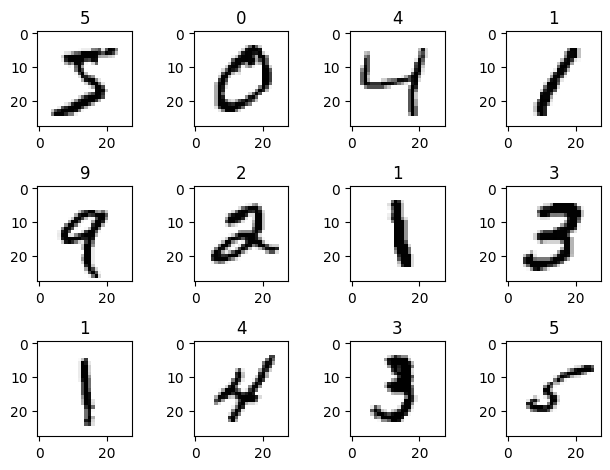

In [9]:
images, titles = X_train[:12], y_train[:12]
display_mult_images(images, titles, 3, 4)

- 방법2

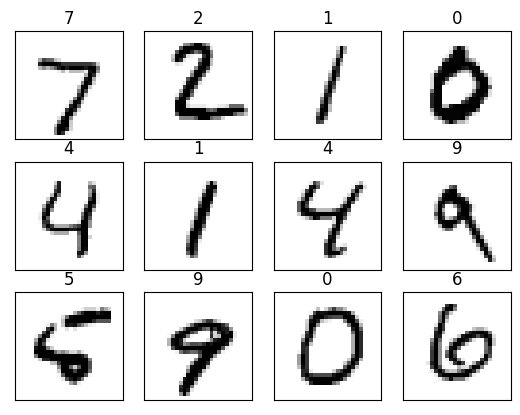

In [10]:
fig = plt.figure()  
for i in range(1, 13): 
    # 2x2 블록 영역의 i 위치(1부터 시작)
    subplot = fig.add_subplot(3, 4, i)
    # x,y축 지점 표시 안함
    subplot.set_xticks([])
    subplot.set_yticks([])
    # subplot 제목
    subplot.set_title('%i' % y_test[i-1])   # ('image %i' % i)
    # 입력으로 사용한 테스트 이미지를 28x28 구조로 재배열하고

    # 그레이스케일 이미지 출력
    subplot.imshow(X_test[i-1].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [11]:
# 이미지의 각 픽셀의 밝기값을 숫자로 표현하기(0~255)
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# 28 x 28의 2차원 배열 -> 784개의 1차원 배열로 변경
# X_train.reshape(총 샘플 수, 1차원 속성의 개수)
X_train = X_train.reshape(X_train.shape[0], 784)
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## Features(X) Normalization
- 케라스는 데이터를 0~1 사이의 값으로 정규화를 했을 때 최적의 성능을 보임

In [14]:
# 실수 값으로 변경, X_train / 255. 계산이면 
X_train = X_train.astype('float64')
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# 0~255 사이값 ->  0~1 사이값으로 변경
X_train = X_train / 255.
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# X_test 데이터도 1차원 변경, 0 ~ 1 정규화 

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

## class(y) one-hot-encoding 실행

In [17]:
# class 확인
print("class : %d " % (y_train[0]))

class : 5 


In [18]:
# one-hot-encoding
y_train = to_categorical(y_train, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_test = to_categorical(y_test, 10)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 딥러닝 모델 구조 설정 및 실행

In [21]:
from tensorflow.keras.metrics import AUC

In [23]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', AUC()])

In [24]:
# 모델 최적화를 위한 설정 구성

modelpath = './models/ch14-mnist_ann_best.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, moitor = 'val_loss', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [48]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/30
225/225 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.9073 - auc_3: 0.9924 - val_loss: 0.1821 - val_accuracy: 0.9489 - val_auc_3: 0.9967
Epoch 2/30
225/225 [==============================] - 1s 3ms/step - loss: 0.1456 - accuracy: 0.9579 - auc_3: 0.9977 - val_loss: 0.1332 - val_accuracy: 0.9601 - val_auc_3: 0.9979
Epoch 3/30
225/225 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9727 - auc_3: 0.9988 - val_loss: 0.1105 - val_accuracy: 0.9679 - val_auc_3: 0.9983
Epoch 4/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9806 - auc_3: 0.9993 - val_loss: 0.1005 - val_accuracy: 0.9696 - val_auc_3: 0.9983
Epoch 5/30
225/225 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9851 - auc_3: 0.9996 - val_loss: 0.0940 - val_accuracy: 0.9721 - val_auc_3: 0.9985
Epoch 6/30
225/225 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9886 - auc_3: 0

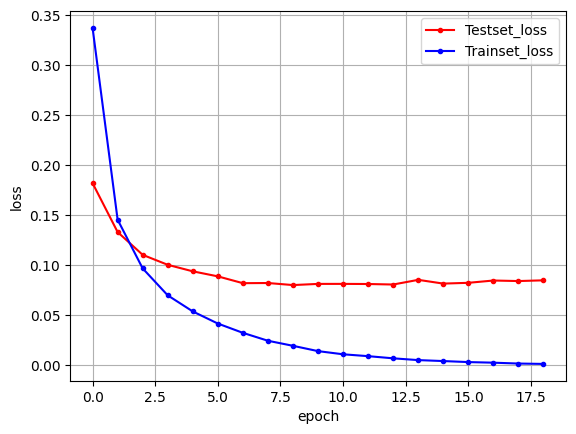

In [51]:
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프 그리기

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 저장한 모델 불러와서 테스트

In [25]:
from tensorflow.keras.models import load_model

In [26]:
loaded_model = load_model('./models/ch14-mnist_ann_best.hdf5')

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# image file의 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, './data_num/my_num3.png')
# image file 읽기
cur_img = Image.open(img_path)

# 28x28로 resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)


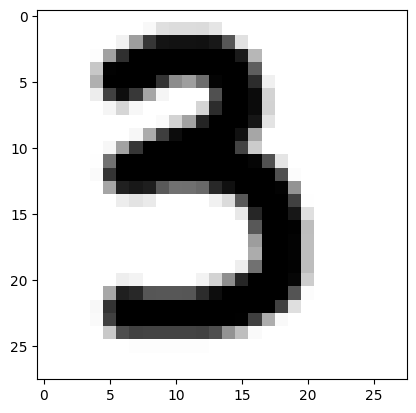

In [28]:
# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
  image = np.mean(image, axis=2)
except:
  pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
# image = np.abs(255-image)

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

## 실행 결과 그래프로 표현

In [29]:
# 이미지들을 float32 데이터 타입으로 변경
# image = image.astype('float32')

# 28*28 형태의 이미지를 784차원으로 flattening
image = image.reshape([-1, 784])

# 값의 반전, 1->0으로 변경
test_data = ((image / 255.) - 1) * -1

In [31]:
# 학습된 model에 넣고 결과 확인
print(loaded_model.predict(image))
print("Model이 예측한 값은 {} 입니다.".format(np.argmax(loaded_model.predict(image), -1)))

1/1 [==============================] - 1s 963ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 27ms/step
Model이 예측한 값은 [2] 입니다.
